In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
from mcu_original import MCUOriginalModel
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [113]:
figure_num = 10**2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=5, c=0.05, figures=figures, params=control_vars, params_names=param_names)


In [114]:
mcu_model.train(max_iters=100)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.004168188790976624


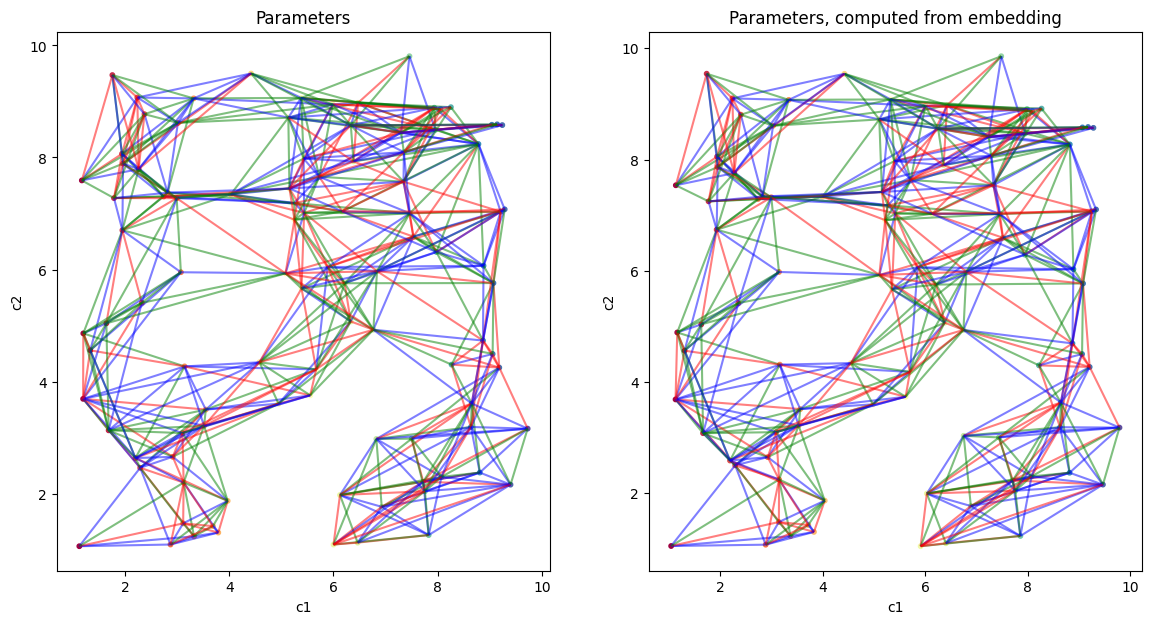

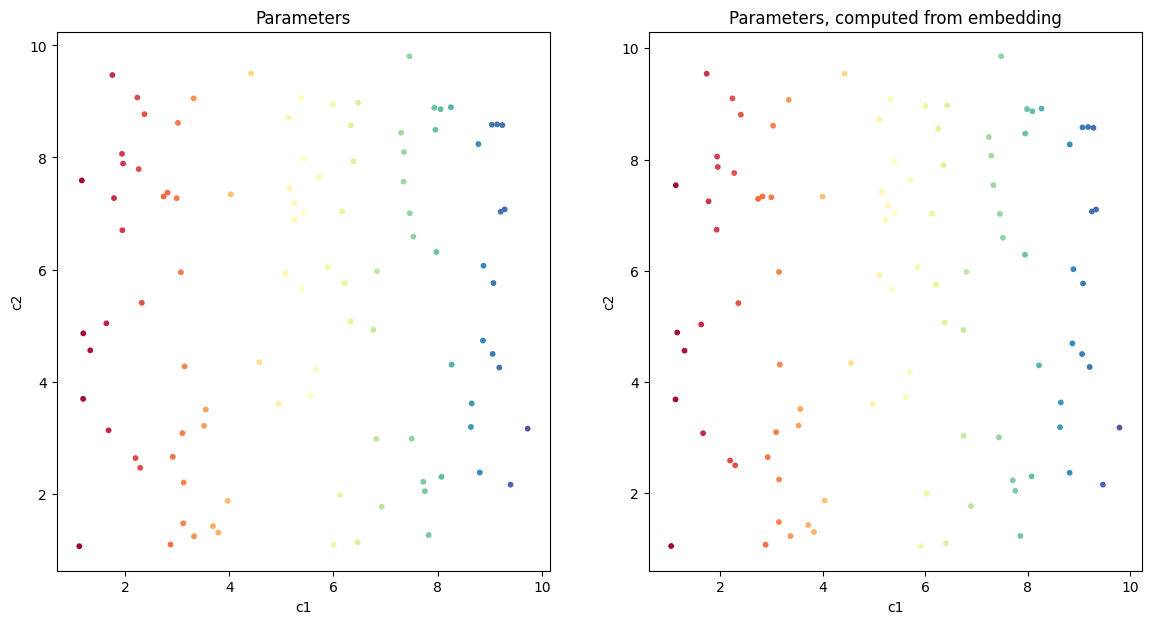

In [115]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [116]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt = 200, noise_level = 0, pieces_cnt=10, test_data_size=10, same_value=False)

Finding neighbors: 30 ms , optimization: 1 ms
-----------
x_opt  = [2.16742769 1.74938119], x_err = 0.011137629169861598
x_real = [1.48798359 1.53294851]
Finding neighbors: 28 ms , optimization: 1 ms
-----------
x_opt  = [2.38909444 1.39669844], x_err = 0.011233884147394069
x_real = [1.52822031 1.03127041]
Finding neighbors: 27 ms , optimization: 0 ms
-----------
x_opt  = [2.50549077 1.25295108], x_err = 0.012598478364831127
x_real = [1.85063611 1.15921114]
Finding neighbors: 29 ms , optimization: 1 ms
-----------
x_opt  = [2.1035713  1.87331582], x_err = 0.011038773761127286
x_real = [1.17582867 1.43987806]
Finding neighbors: 27 ms , optimization: 1 ms
-----------
x_opt  = [2.22518838 1.55397841], x_err = 0.010671281762034438
x_real = [1.30554475 1.12353535]
Finding neighbors: 28 ms , optimization: 0 ms
-----------
x_opt  = [2.24054319 1.78690314], x_err = 0.010957033497317229
x_real = [1.85239078 1.69217056]
Finding neighbors: 29 ms , optimization: 1 ms
-----------
x_opt  = [2.158176

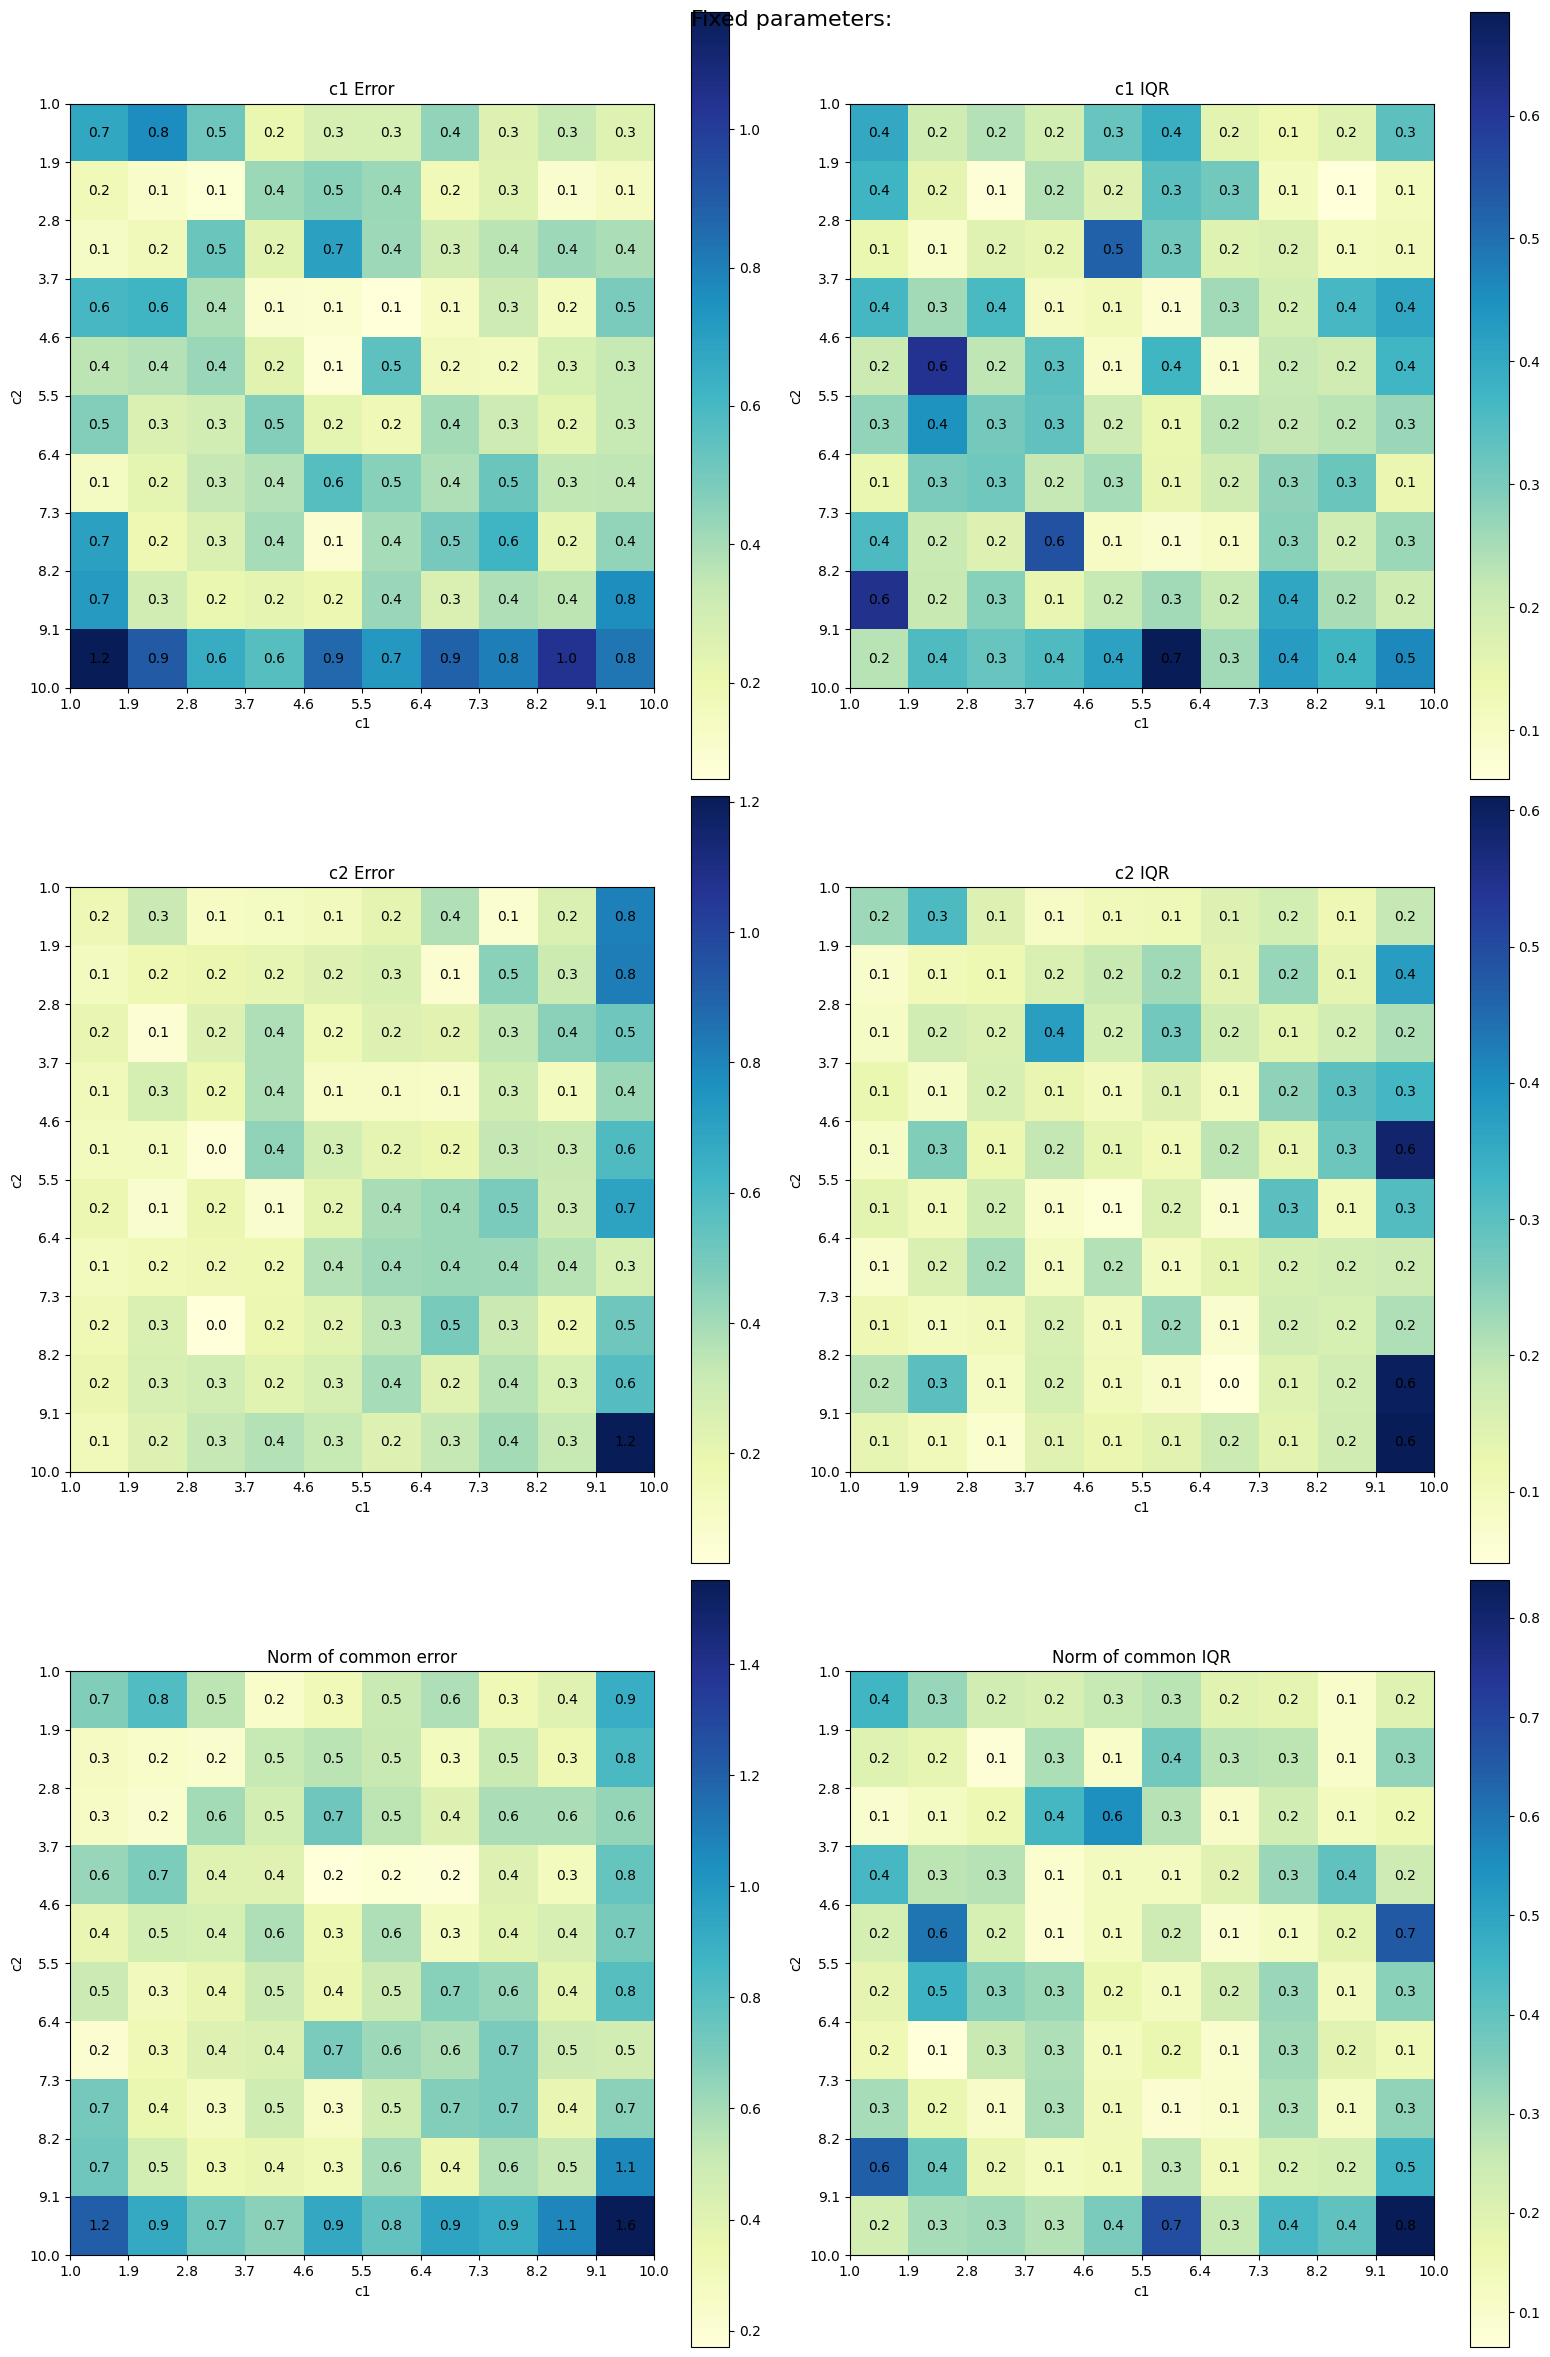

In [119]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs)

24.49489742783178